# Predicting heart disease using Machine Learning

> The goal of the notebook is to train a model based on the medical attributes of the patients/people and to predict if a person has heart disease or not based on the medical attributes of the people. 

#### Steps to take:-

* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem Definition

> Given clinical parameters about a particular patient, can we predict whether or not they have heart disease?

## Data

* The original data for training the model came from -> 'https://archive.ics.uci.edu/ml/datasets/heart+Disease'

* There is a slightly different version of these dataset available in kaggle -> 'https://www.kaggle.com/ronitf/heart-disease-uci'


## Evaluation

> If we get more than 95% accuracy with the trained model predicting if the patient has heart disease or not during the proof of concept of the model, then we can carry on improving/ expanding the heart disease model.

## Features

> These are the various different information about the features of the dataset that are used here. 

**Create Data Dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




### Importing all of the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score,plot_roc_curve

In [8]:
df=pd.read_csv('./dataset/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

## EDA or Exploratory Data Analysis

> The goal here is to find out more about the data and become a subject matter expert on the dataset that we are working with

* What questions are we trying to solve?
* What kind og data we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of the data?

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

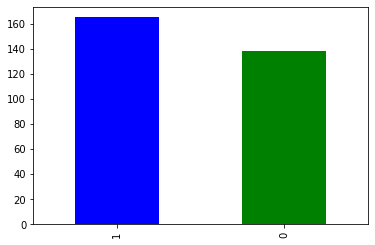

In [12]:
df['target'].value_counts().plot(kind='bar', color=['Blue', 'Green'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df['sex'].sum()

207

In [22]:
df['sex'].unique()

array([1, 0])

In [24]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

## Sex VS Heart Disease

In [25]:
# Comparing the target and the sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='target'>

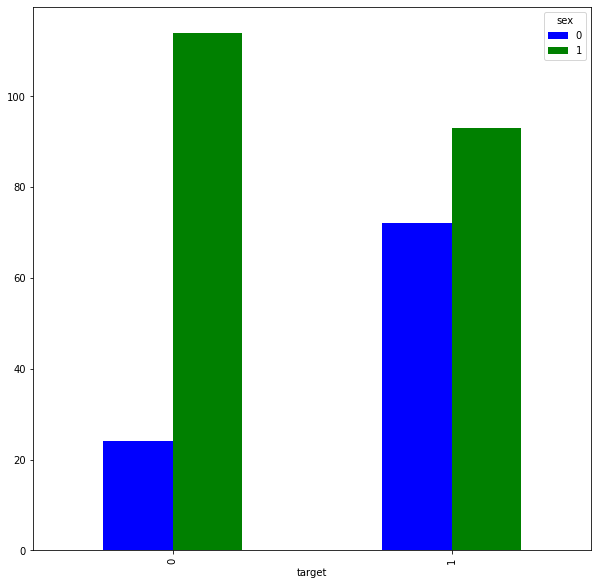

In [26]:
pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(10,10), color=['Blue','Green'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

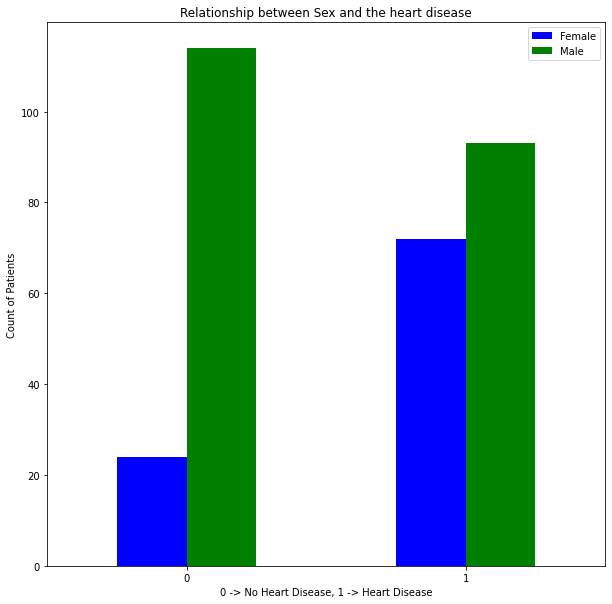

In [28]:
## Visualizing the sex and target column for easier understanding and for others to look at a glance and see what's happening.

pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(10,10), color=['Blue','Green'])

plt.title('Relationship between Sex and the heart disease')
plt.xlabel('0 -> No Heart Disease, 1 -> Heart Disease')
plt.ylabel('Count of Patients')

plt.legend(['Female','Male'])
plt.xticks(rotation=0)

In [30]:
df['thalach'].value_counts() # Length: 91 means that this feature has 91 different/unique values in this feature column

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age Vs Max Heart Rate(Thalach) For Heart Disease

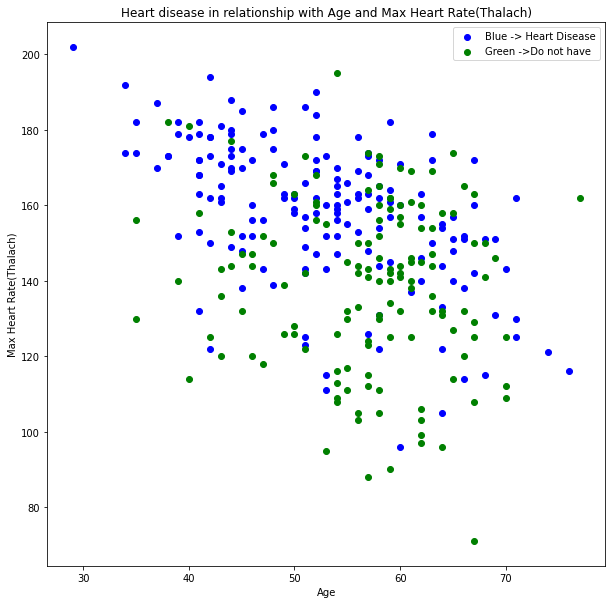

In [36]:
plt.figure(figsize=(10,10))

# Plotting with positive(Have Heart Disease) examples
plt.scatter(df.age[df['target'] ==1], df.thalach[df.target==1], c='Blue')

# Plotting with negative(Do not have Heart Disease) examples
plt.scatter(df.age[df['target'] ==0], df.thalach[df.target==0], c='Green')
plt.title('Heart disease in relationship with Age and Max Heart Rate(Thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate(Thalach)')
plt.legend(['Blue -> Heart Disease', 'Green ->Do not have'])

<AxesSubplot:ylabel='Frequency'>

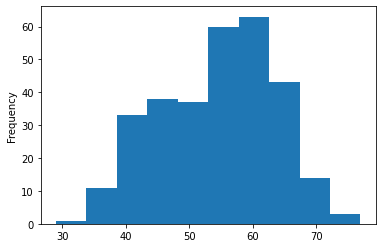

In [37]:
## Checking Age Distribution with histogram
df['age'].plot.hist()

In [39]:
## Heart Disease in correlation to Chest pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

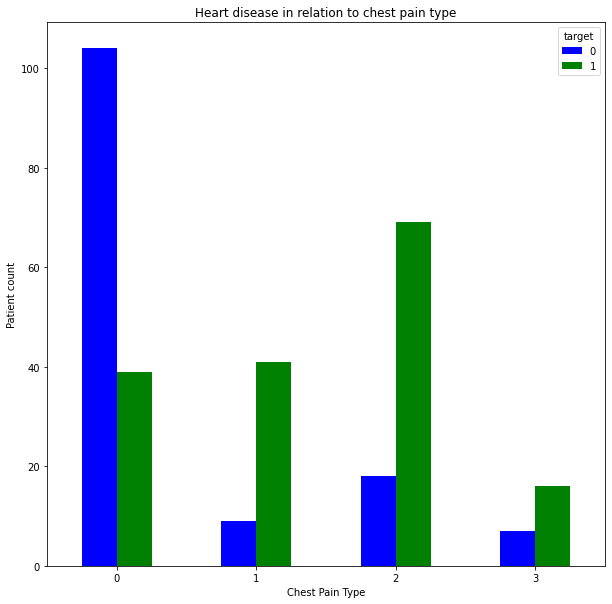

In [42]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,10), color=['Blue', 'Green'])

plt.title('Heart disease in relation to chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patient count')
plt.xticks(rotation=0)